# Thông tin sinh viên
* Họ và tên: Mai Duy Nam
* MSSV: 19120298

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
sns.set_style('ticks')
sns.set_palette('colorblind')

# Nạp dữ liệu, tiền xử lý

In [3]:
df = pd.read_csv('ToyotaCorolla.csv')
df.head()

,Price,Age,Kilometers,Fuel_Type,HP,Metallic,Color,Automatic,CC,Doors,Quarterly_Tax,Weight
0,13500,23,46986,Diesel,90,1,Blue,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,Silver,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,Blue,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,Black,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,Black,0,2000,3,210,1170


In [4]:
df.dtypes

Price             int64
Age               int64
Kilometers        int64
Fuel_Type        object
HP                int64
Metallic          int64
Color            object
Automatic         int64
CC                int64
Doors             int64
Quarterly_Tax     int64
Weight            int64
dtype: object

In [5]:
df['Metallic'].unique()

array([1, 0], dtype=int64)

In [6]:
df['Automatic'].unique()

array([0, 1], dtype=int64)

Đổi kiểu dữ liệu của cột Metallic và Automatic thành bool.

In [7]:
df['Metallic'] = df['Metallic'].astype(bool)
df['Automatic'] = df['Automatic'].astype(bool)

Loại outlier (các outlier này được phát hiện sau nhiều lần trực quan).

In [8]:
df = df[df['CC'] < 15000]

# 1. Trực quan hóa các thông tin thống kê mô tả cho các biến

## Các cột dạng phân loại

In [9]:
cat_cols = ['Fuel_Type', 'Metallic', 'Color', 'Automatic']

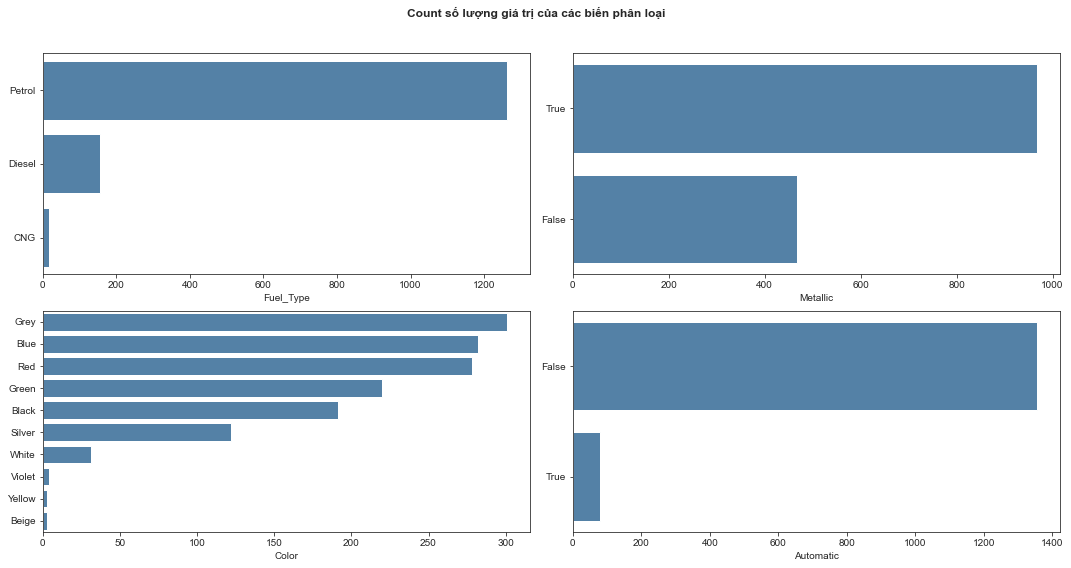

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

for i, col in enumerate(cat_cols):
    value_counts = df[col].value_counts().sort_values(ascending=False)
    
    ax = axes[i//2][i%2]
    sns.barplot(x=value_counts, y=value_counts.index.astype(str),
                color='steelblue', ax=ax)

fig.tight_layout()
fig.suptitle('Count số lượng giá trị của các biến phân loại', fontweight='bold')
fig.subplots_adjust(top=0.9)
plt.show()

## Các cột dạng số

In [11]:
num_cols = df.select_dtypes(include='int64').columns
num_cols

Index(['Price', 'Age', 'Kilometers', 'HP', 'CC', 'Doors', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [12]:
melted = df[num_cols].melt()
melted

,variable,value
0,Price,13500
1,Price,13750
2,Price,13950
3,Price,14950
4,Price,13750
...,...,...
11475,Weight,1025
11476,Weight,1015
11477,Weight,1015
11478,Weight,1015


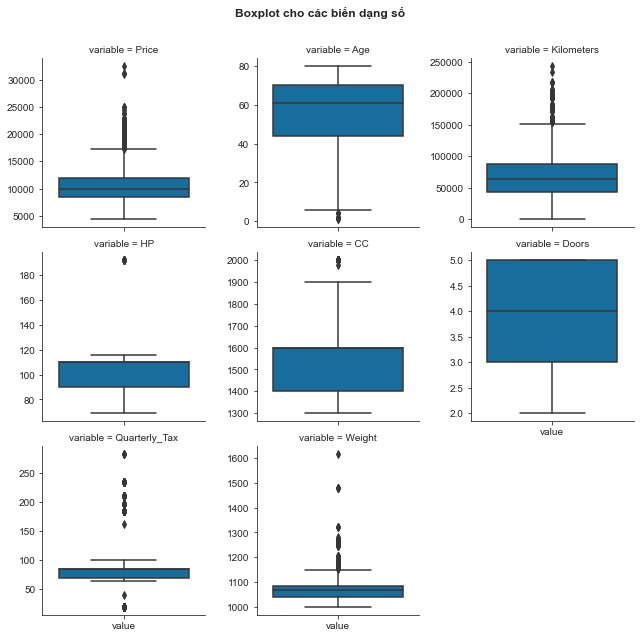

In [13]:
boxplot_fg = sns.FacetGrid(
    data=melted,
    col='variable',
    col_wrap=3,
    sharey=False,
)

boxplot_fg.map_dataframe(sns.boxplot)
boxplot_fg.fig.suptitle('Boxplot cho các biến dạng số', fontweight='bold')
boxplot_fg.fig.subplots_adjust(top=0.9)
plt.show()

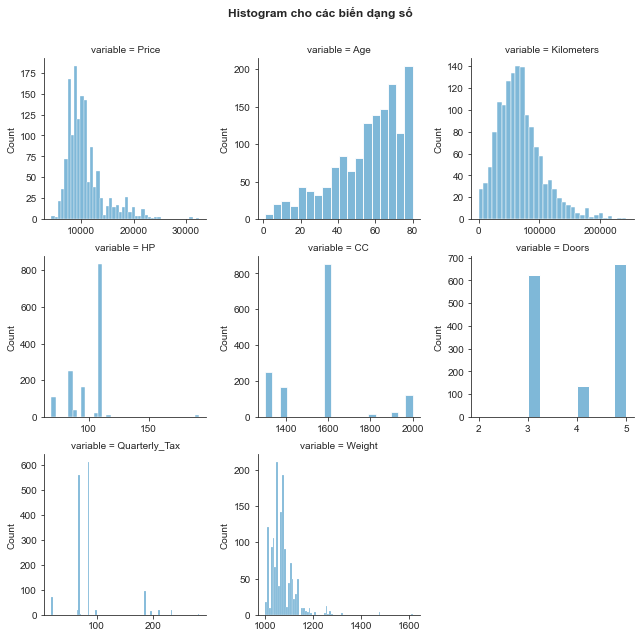

In [14]:
histplot_fg = sns.FacetGrid(
    data=melted,
    col='variable',
    col_wrap=3,
    sharey=False,
    sharex=False,
)

histplot_fg.map_dataframe(sns.histplot)

histplot_fg.fig.suptitle('Histogram cho các biến dạng số', fontweight='bold')
histplot_fg.fig.subplots_adjust(top=0.9)
plt.show()

# 2. Tìm và trực quan mối quan hệ tương quan giữa các cặp biến (nếu có)

Heatmap của hệ số tương quan giữa các cặp biến dạng số.

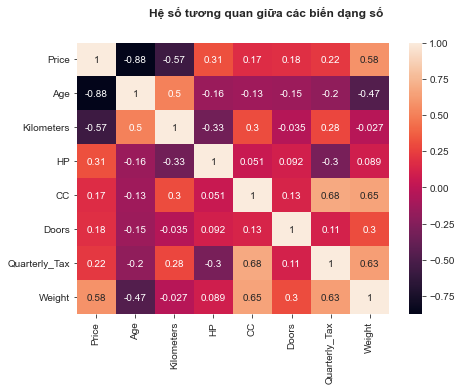

In [15]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(df[num_cols].corr(), annot=True, ax=ax)

fig.suptitle('Hệ số tương quan giữa các biến dạng số', fontweight='bold')
plt.show()

Pairplot giữa các cặp biến kiểu số.

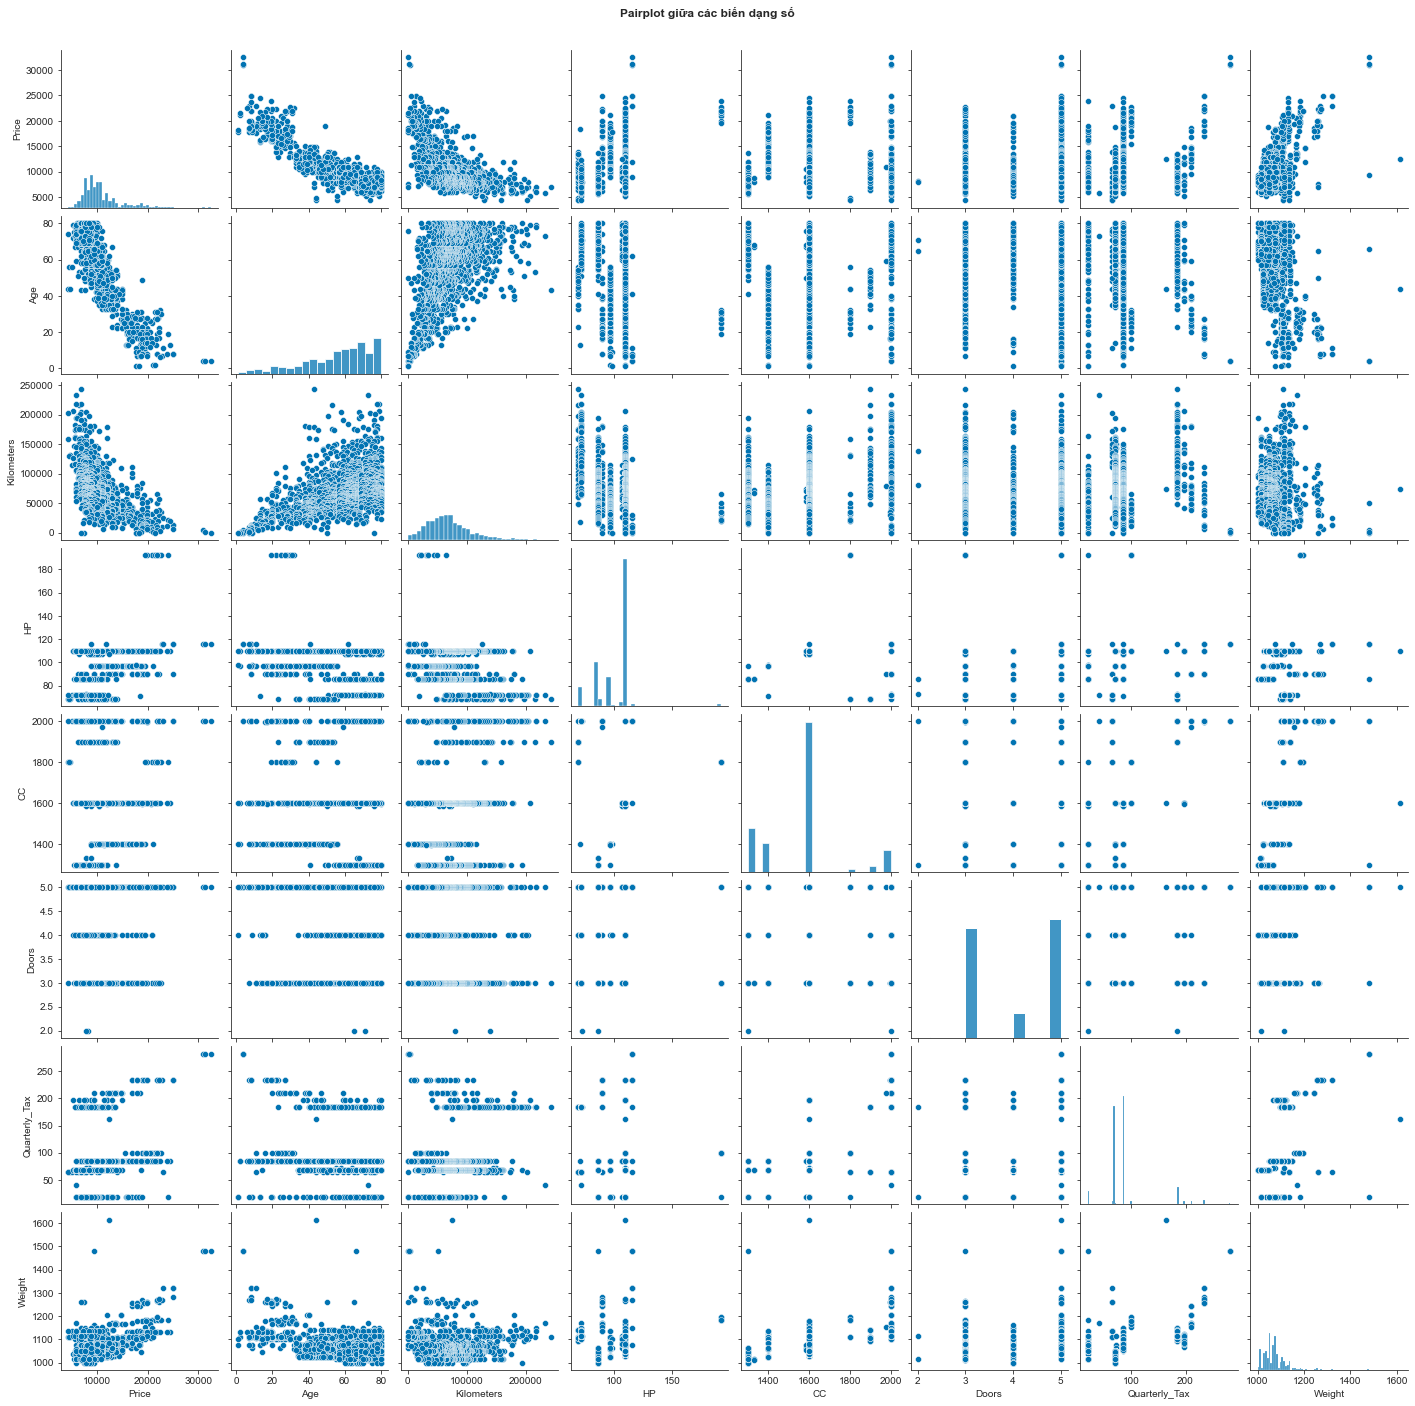

In [16]:
sns.pairplot(data=df[num_cols])
plt.suptitle('Pairplot giữa các biến dạng số', fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.show()

Một số cặp biến có quan hệ tương quan đáng chú ý. Các cặp này có hệ số tương quan lớn được chọn từ heatmap phía trên.

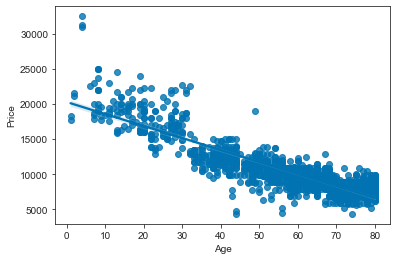

In [17]:
sns.regplot(data=df, x='Age', y='Price');

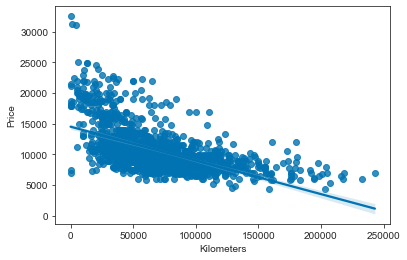

In [18]:
sns.regplot(data=df, x='Kilometers', y='Price');

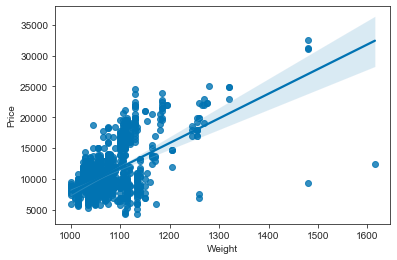

In [19]:
sns.regplot(x=df['Weight'], y=df['Price']);

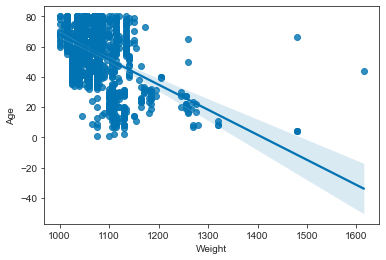

In [20]:
sns.regplot(data=df, x='Weight', y='Age');

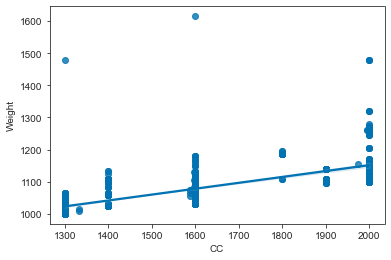

In [21]:
sns.regplot(data=df, x='CC', y='Weight');

Tích giữa Kilometers và Age cũng có tương quan với Price.

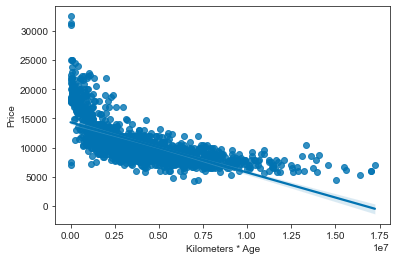

In [22]:
sns.regplot(x=df['Kilometers'] * df['Age'], y=df['Price'])
plt.xlabel('Kilometers * Age')
plt.show()

# 3. Trực quan hóa biểu đồ histogram cho Price theo từng biến

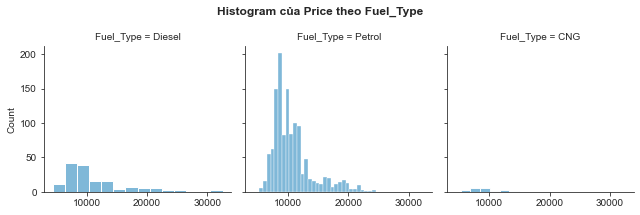

In [23]:
price_fuel_fg = sns.FacetGrid(
    data=df[['Fuel_Type', 'Price']],
    col='Fuel_Type',
)

price_fuel_fg.map_dataframe(sns.histplot)
price_fuel_fg.fig.suptitle('Histogram của Price theo Fuel_Type', fontweight='bold')
price_fuel_fg.fig.subplots_adjust(top=0.8)
plt.show()

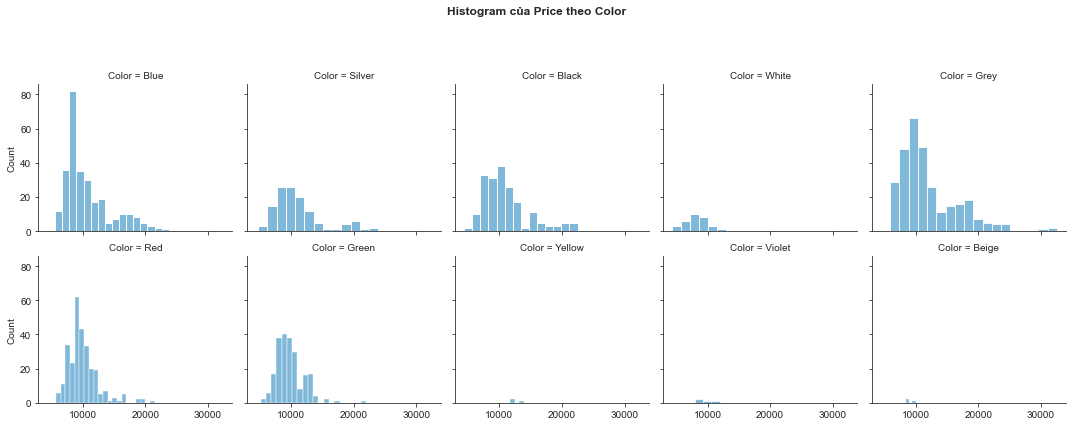

In [24]:
price_color_fg = sns.FacetGrid(
    data=df[['Color', 'Price']],
    col='Color',
    col_wrap=5,
)

price_color_fg.map_dataframe(sns.histplot)
price_color_fg.fig.suptitle('Histogram của Price theo Color', fontweight='bold')
price_color_fg.fig.subplots_adjust(top=0.8)
plt.show()

# 4. Mô hình dự báo Price

In [25]:
scaled_df = df.copy()

# Thêm thuộc tính Kilometers nhân Age
scaled_df['Kilometers_times_Age'] = scaled_df['Kilometers'] * scaled_df['Age']
scalers = dict()

num_cols = scaled_df.select_dtypes(include='int64').columns
for col in num_cols:
    # Lưu các StandardScaler lại để sử dụng cho lúc sau
    scaler = StandardScaler()
    scalers[col] = scaler
    
    scaled_df[col] = scaler.fit_transform(scaled_df[col].values.reshape(-1, 1))

Xây dựng mô hình hồi quy tuyến tính để dự đoán giá xe. Những thuộc tính dưới đây được lựa chọn bằng tay.

In [26]:
formula = 'Price ~ Age + Kilometers + Kilometers_times_Age + HP + Weight + Quarterly_Tax + C(Automatic) + Fuel_Type + CC'
linear_model = smf.ols(
    formula=formula,
    data=scaled_df
)
result = linear_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1139.
Date:                Mon, 27 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:53:03   Log-Likelihood:                -459.57
No. Observations:                1435   AIC:                             941.1
Df Residuals:                    1424   BIC:                             999.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.6311 

Hiệu quả của mô hình trên tập train.

In [27]:
y_pred = result.predict(scaled_df)
y_true = scaled_df['Price']

In [28]:
mean_squared_error(y_true, y_pred)

0.11109557233429006

Scatterplot giữa giá trị xe thực tế và giá trị dự đoán.

In [29]:
# Lấy giá trị xe dự đoán từ giá trị đang được scale
price_scaler = scalers['Price']
price_pred = price_scaler.inverse_transform(y_pred.values.reshape(-1, 1)).ravel()

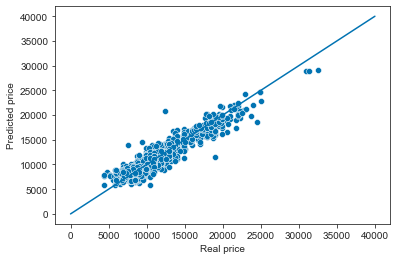

In [30]:
sns.scatterplot(x=df['Price'], y=price_pred)
sns.lineplot(x=[0, 40000], y=[0, 40000])
plt.xlabel('Real price')
plt.ylabel('Predicted price')
plt.show()